<a href="https://colab.research.google.com/github/AndreSimao-alms/Planejamento-Fatorial-Completo/blob/main/Planejamento_Fatorial_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planejamento Fatorial em Química

    

**Autor:** André Simão, aluno de graduação do curso de bacharelado em química tecnológica pela UFSCar.\
\
**Objetivo geral:** Automatizar tratamento de dados para planejamento fatorial completo para experimentos de 2^4. Dessa forma, a aplicabilidade do programa é em foco para facilitar e aumentar a eficiência do trabalho de experimentadores que não possuem proficiência em linguagem de programação.\
\
**Corpo do projeto:** O desenvolvimento das rotinas em plannejamento fatorial será dividida conforme o conteúdo ofericido pelo curso de Introdução a Quimiometria ministrado pelo Prof. Dr. Edenir Rodrigues Pereira Filho. Tendo em vista esta organização, a divisão de funções será constituido em quatro principais tópicos: planejamento fatorial completo, planejamento fatorial fracionário e construção de modelos de regressão.\
\
**Referências bibliográficas:**\
[1]. Pereira Filho, Edenir R. "Planejamento fatorial em química: maximizando a obtenção de resultados." Edufscar: São Carlos (2015).\
\
[2]. Pereira, Fabíola Manhas Verbi, and Edenir Rodrigues Pereira-Filho. "Aplicação de programa computacional livre em planejamento de experimentos: um tutorial." Química Nova 41 (2018): 1061-1071.\
\
[3]. Teófilo, Reinaldo F., and Márcia Ferreira. "Quimiometria II: planilhas eletrônicas para cálculos de planejamentos experimentais, um tutorial." Química nova 29 (2006): 338-350.\


# Bibliotecas

In [607]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from scipy.stats import norm
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats

# Planejamento Fatorial Completo - Parte 1

**CAPÍTULO 1: PLANEJAMENTO FATORIAL EM QUÍMICA.**

## Leitura e limpeza de dados (Excel)

O primeiro passo é realizar a leitura de dados, neste rotina de planejamento fatorial completo não será inclusa a etapa de codificação dos resultados experimentais. O programa necessariamente realiza a leitura da tabela com os resultados experimentais dos 16 experimentos, pois trata-se de dois níveis e 4 variaveis, juntamente com a interação das variáveis, indicada pela Figura 1.\
\
Figura 1. Modelo de tabela recebida pelo arquivo 'efeitos.xlsm'.
 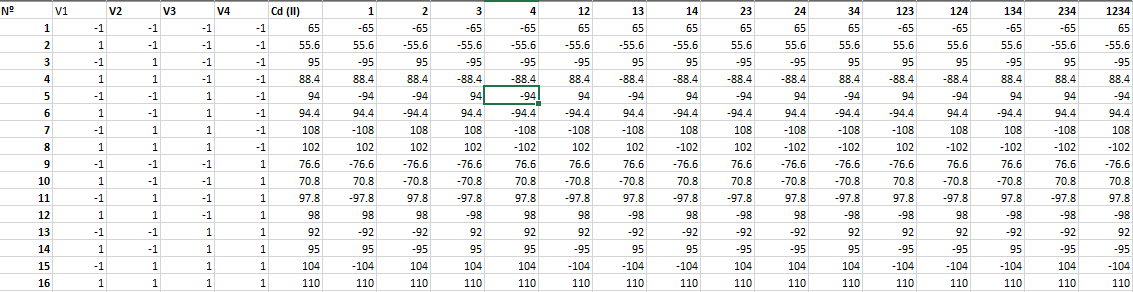\
 \
Após a leitura, a tabela sofre uma modificação através do método .iloc da biblioteca Pandas para selecionar somente o efeito das variáveis em seguido é realizado os cálculos de efeitos, quadrado dos efeitos e porcentagem de contribuição dos quadrados de efeitos em relação a soma.

In [608]:
leitura1 = pd.read_excel('efeitosr1.xlsm')
dados1 = leitura1.iloc[:,6:21]
dados1

,1,2,3,4,12,13,14,23,24,34,123,124,134,234,1234
0,-65.000,-65.000,-65.000,-65.000,65.000,65.000,65.000,65.000,65.000,65.000,-65.000,-65.000,-65.000,-65.000,65.000
1,55.600,-55.600,-55.600,-55.600,-55.600,-55.600,-55.600,55.600,55.600,55.600,55.600,55.600,55.600,-55.600,-55.600
2,-95.000,95.000,-95.000,-95.000,-95.000,95.000,95.000,-95.000,-95.000,95.000,95.000,95.000,-95.000,95.000,-95.000
3,88.400,88.400,-88.400,-88.400,88.400,-88.400,-88.400,-88.400,-88.400,88.400,-88.400,-88.400,88.400,88.400,88.400
4,-94.000,-94.000,94.000,-94.000,94.000,-94.000,94.000,-94.000,94.000,-94.000,94.000,-94.000,94.000,94.000,-94.000
5,94.400,-94.400,94.400,-94.400,-94.400,94.400,-94.400,-94.400,94.400,-94.400,-94.400,94.400,-94.400,94.400,94.400
6,-108.000,108.000,108.000,-108.000,-108.000,-108.000,108.000,108.000,-108.000,-108.000,-108.000,108.000,108.000,-108.000,108.000
7,102.000,102.000,102.000,-102.000,102.000,102.000,-102.000,102.000,-102.000,-102.000,102.000,-102.000,-102.000,-102.000,-102.000
8,-76.600,-76.600,-76.600,76.600,76.600,76.600,-76.600,76.600,-76.600,-76.600,-76.600,76.600,76.600,76.600,-76.600
9,70.800,-70.800,-70.800,70.800,-70.800,-70.800,70.800,70.800,-70.800,-70.800,70.800,-70.800,-70.800,70.800,70.800


## Cálculo de efeitos 

O cáculo de efeitos, neste caso, é dado pela diferença da média das respostas de nível alto e baixo, indicado pela pela equação 1.\
\
Equação 1. Efeito para as variáveis e interações. [3] \
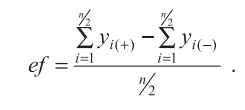


In [609]:
soma1=[]
for i in range(15):
    s = dados1.iloc[:,i]
    soma1.append(sum(s))
    somas1 = np.array(soma1)
efeitos1 = somas1/8
efeitor1 = []
for i in efeitos1:
  efeitor1.append(i)
efeitor1

[-2.5593749999999984,
 22.471875,
 21.403125000000003,
 5.878125000000002,
 0.7593750000000008,
 3.515625,
 3.515625,
 -8.803125000000003,
 -1.265625,
 -5.146875000000003,
 -1.7156250000000024,
 1.7718749999999992,
 0.5906249999999984,
 2.7843750000000016,
 0.8718750000000024]

In [610]:
index= [1,2,3,4,12,13,14,23,24,34,123,124,134,234,1234]

In [611]:
efeito1 = pd.Series(efeitor1, index=index, name='Efeitos/Quadrado/Porcentagem')
efeito3 = efeito1.sort_values()
#efeito1 = efeito1.values
efeito3


23      -8.803125
34      -5.146875
1       -2.559375
123     -1.715625
24      -1.265625
134      0.590625
12       0.759375
1234     0.871875
124      1.771875
234      2.784375
13       3.515625
14       3.515625
4        5.878125
3       21.403125
2       22.471875
Name: Efeitos/Quadrado/Porcentagem, dtype: float64

## Quadrado dos efeitos


É dado pelo quadrado dos efeitos de cada variável e interação, indicado pela Equação.\
\
Equação 2: Quadrados dos efeitos.\
\
**quadrado = (efeitos)²**

In [612]:
quadrado1 = efeito3**2
quadrado1

23       77.495010
34       26.490322
1         6.550400
123       2.943369
24        1.601807
134       0.348838
12        0.576650
1234      0.760166
124       3.139541
234       7.752744
13       12.359619
14       12.359619
4        34.552354
3       458.093760
2       504.985166
Name: Efeitos/Quadrado/Porcentagem, dtype: float64

## Porcentagem 

A porcentagem de contribuição de cada efeitos é calculado com a relação do quadrados dos efeitos com o somatório dos quadrados dos efeitos de cada variável e interação, indicado pela Equação 3.\
\
Equação 3. Porcentagem de contribuição de cada efeitos.\
\
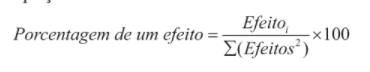

In [613]:
porcentagem1= quadrado1/sum(quadrado1)
porcentagem1

23      0.067386
34      0.023035
1       0.005696
123     0.002559
24      0.001393
134     0.000303
12      0.000501
1234    0.000661
124     0.002730
234     0.006741
13      0.010747
14      0.010747
4       0.030045
3       0.398339
2       0.439114
Name: Efeitos/Quadrado/Porcentagem, dtype: float64

## Início, fim, centro e z

In [614]:
#n_int = int(input('Qual o número de variáveis e interações?: '))
n_int = 15
fim = []
inicio = [0]
centro = []
gauss = []
inc = (1/(n_int))
for i in range(n_int):
   fim.append(inicio[i] + inc)
   inicio.append(fim[i])
   centro.append((inicio[i]+fim[i])/2)
   gauss.append(norm.ppf(centro))
z = []
for j in gauss[n_int-1]:
  z.append(j)
del inicio[n_int]

## Construção do dataframe com os resultados


In [615]:
index1 = efeito3.index

In [616]:
colunas1 = {'Efeitos R1' :efeito3 ,'Quadrado':quadrado1,'Porcentagem':porcentagem1,"Início":inicio,'Fim':fim,'Centro':centro,'Gaussiana':z}

In [617]:
gauss1 = pd.DataFrame(colunas1, index=index1)
gauss1 = gauss1.rename_axis('N°')
gauss1

,Efeitos R1,Quadrado,Porcentagem,Início,Fim,Centro,Gaussiana
N°,,,,,,,
23,-8.803125,77.495010,0.067386,0.000000,0.066667,0.033333,-1.833915
34,-5.146875,26.490322,0.023035,0.066667,0.133333,0.100000,-1.281552
1,-2.559375,6.550400,0.005696,0.133333,0.200000,0.166667,-0.967422
123,-1.715625,2.943369,0.002559,0.200000,0.266667,0.233333,-0.727913
24,-1.265625,1.601807,0.001393,0.266667,0.333333,0.300000,-0.524401
134,0.590625,0.348838,0.000303,0.333333,0.400000,0.366667,-0.340695
12,0.759375,0.576650,0.000501,0.400000,0.466667,0.433333,-0.167894
1234,0.871875,0.760166,0.000661,0.466667,0.533333,0.500000,0.000000
124,1.771875,3.139541,0.002730,0.533333,0.600000,0.566667,0.167894


## Gráficos 

In [618]:
sns.set_theme(style="darkgrid")

### Gráfico 1: Probabilidade (Efeito x z)

### Plot do gráfico 1 

In [619]:
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P']
len(markers)

15

In [620]:
def etiqueta(annotations): 
  for i,label in enumerate(annotations):
    plt.annotate(label, (list(gauss1.iloc[:,0])[i],list(gauss1.iloc[:,6])[i]))

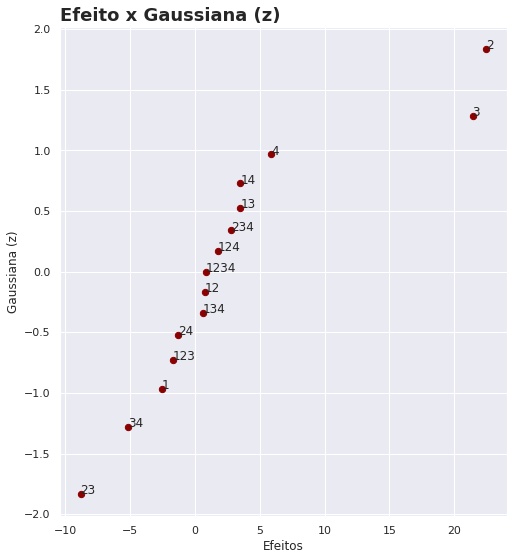

In [621]:
def grafico1():
    annotations = list(gauss1.index)
    plt.figure(figsize=(8,9))
    ax1 = plt.scatter(list(gauss1.iloc[:,0]),list(gauss1.iloc[:,6]),s=40, color='darkred')
    plt.title('Efeito x Gaussiana (z)', fontsize=18, fontweight='black', loc='left')
    plt.ylabel('Gaussiana (z)')
    plt.xlabel('Efeitos')
    etiqueta(annotations)
grafico1()

### Gráfico 2: Porcentagem de efeito x Interações

### Selecionando dados do dataframe

In [622]:
x2= np.array(porcentagem1.index)
y2= porcentagem1.values

In [623]:
data2= pd.DataFrame({'Efeitos R1': x2, 'Porcentagem (%)': y2})
data2

,Efeitos R1,Porcentagem (%)
0,23,0.067386
1,34,0.023035
2,1,0.005696
3,123,0.002559
4,24,0.001393
5,134,0.000303
6,12,0.000501
7,1234,0.000661
8,124,0.002730
9,234,0.006741


### Plot do gráfico 2

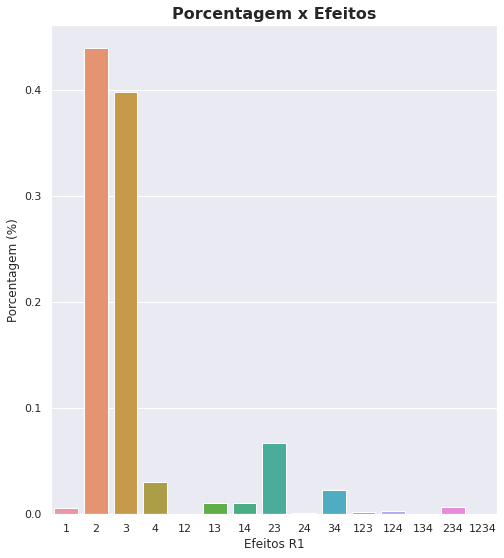

In [624]:
def grafico2():
    plt.figure(figsize=(8,9))
    tips = sns.load_dataset("tips")
    ax2 = sns.barplot(x='Efeitos R1', y='Porcentagem (%)', data=data2)
    ax2.set_title('Porcentagem x Efeitos', fontsize=16, fontweight='black')
grafico2()

# Reorganização do Planejamento 

## Variância e Erro de um Efeito

### Variância e Erro Experimental

#### Excluindo variáveis insignificantes   

In [625]:
V1 = leitura1['V1'][:16].values
V2 = leitura1['V2'][:16].values
V3 = leitura1['V3'][:16].values
V4 = leitura1['V4'][:16].values
R = leitura1['R'][:16].values

In [626]:
col = {'V1': V1, 'V2':V2, 'V3':V3, 'V4':V4, 'R': R}
exp = pd.Series(list(range(1,17)))
dados2 = pd.DataFrame(col, index=exp)
dados2

,V1,V2,V3,V4,R
1,-1.0,-1.0,-1.0,-1.0,65.0
2,1.0,-1.0,-1.0,-1.0,55.6
3,-1.0,1.0,-1.0,-1.0,95.0
4,1.0,1.0,-1.0,-1.0,88.4
5,-1.0,-1.0,1.0,-1.0,94.0
6,1.0,-1.0,1.0,-1.0,94.4
7,-1.0,1.0,1.0,-1.0,108.0
8,1.0,1.0,1.0,-1.0,102.0
9,-1.0,-1.0,-1.0,1.0,76.6
10,1.0,-1.0,-1.0,1.0,70.8


In [627]:
def coleta():
  x=0
  var_exp = []
  N=''
  while True:
    x+=1
    if x <= 4:
      var_insg = input(f'Digite a variável {x} insignificante?(V1, V2, V3 ou V4): ')
      N = str(input('Pressione qualquer tecla para continuar, caso contrário digite "N" para sair. ')).strip().upper()[0]
      var_exp.append(var_insg.upper())
    if N == "N":
      break
      exit()
    if x == 4:
      print('Todas variáveis são insignificantes.')
      break
      exit()
  return var_exp

In [628]:
dados2

,V1,V2,V3,V4,R
1,-1.0,-1.0,-1.0,-1.0,65.0
2,1.0,-1.0,-1.0,-1.0,55.6
3,-1.0,1.0,-1.0,-1.0,95.0
4,1.0,1.0,-1.0,-1.0,88.4
5,-1.0,-1.0,1.0,-1.0,94.0
6,1.0,-1.0,1.0,-1.0,94.4
7,-1.0,1.0,1.0,-1.0,108.0
8,1.0,1.0,1.0,-1.0,102.0
9,-1.0,-1.0,-1.0,1.0,76.6
10,1.0,-1.0,-1.0,1.0,70.8


In [629]:
def tabela_nova1(dados2):
  dados2 = dados2.drop(cond[0], axis='columns')
  a1 = dados2[dados2.T.index[0]].values
  a2 = dados2[dados2.T.index[1]].values
  a3 = dados2[dados2.T.index[2]].values
  a1a2 = a1*a2
  a1a3 = a1*a3
  a2a3 = a2*a3
  dados2.insert(3, f"{dados2.T.index[0]}{dados2.T.index[1]}", a1a2, allow_duplicates=False)
  dados2.insert(4, f"{dados2.T.index[0]}{dados2.T.index[2]}", a1a3, allow_duplicates=False)
  dados2.insert(5, f"{dados2.T.index[1]}{dados2.T.index[2]}", a2a3, allow_duplicates=False)
  dados3 = dados2.sort_values([f'{dados2.T.index[0]}', f'{dados2.T.index[1]}', f'{dados2.T.index[2]}'], ascending=True)
  return dados3
def tabela_nova2(dados2):
  dados2 = dados2.drop(cond[0], axis='columns')
  dados2 = dados2.drop(cond[1], axis='columns')
  a1 = dados2[dados2.T.index[0]].values
  a2 = dados2[dados2.T.index[1]].values
  a1a2 = a1*a2
  dados3 = dados2.insert(2, f"{dados2.T.index[0]}{dados2.T.index[1]}", a1a2, allow_duplicates=False)
  dados3 = dados2.sort_values([f'{dados2.T.index[0]}',f'{dados2.T.index[1]}'], ascending=True)
  return dados3
def tabela_nova3(dados2):
  dados2 = dados2.drop(cond[0], axis='columns')
  dados2 = dados2.drop(cond[1], axis='columns')
  dados2 = dados2.drop(cond[2], axis='columns')
  a1 = dados2[dados2.T.index[0]].values
  dados3 = dados2.sort_values([f'{dados2.T.index[0]}'], ascending=True)
  return dados3

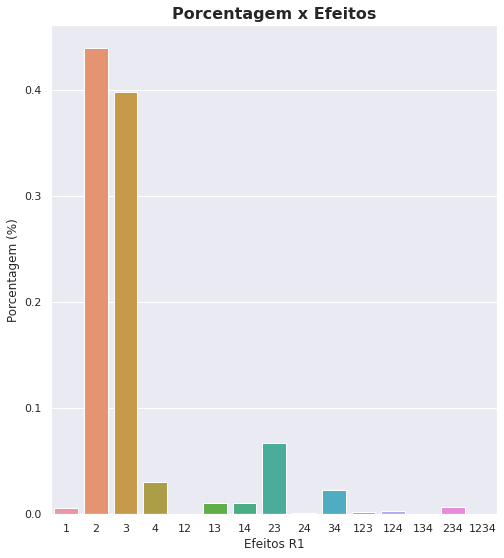

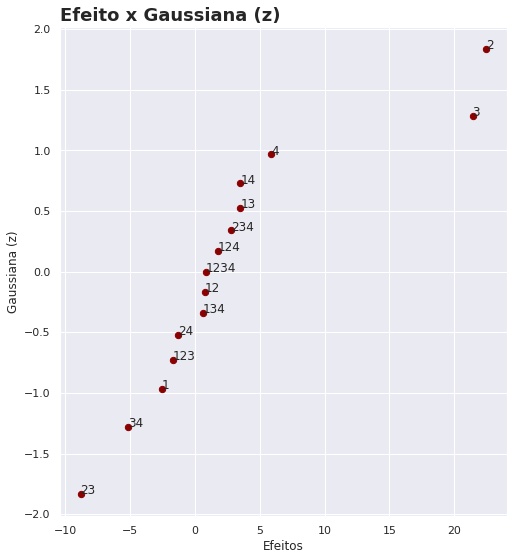

In [630]:
grafico2()
grafico1()

In [631]:
cond = coleta()
if len(cond) == 1:
  dados3 = tabela_nova1(dados2)
  R2 = []
  for i in range(1,17,2):
    R2.append(dados3['R'].iloc[i])
  replicas = dados3.iloc[:,0:-1]
  replicas = replicas.drop_duplicates()
  replicas['R1'] = dados3['R']
  replicas['R2'] = R2
if len(cond) == 2:
  dados3 = tabela_nova2(dados2)
  R=[]
  R2=[]
  R3=[]
  R4=[]
  for i in range(0,16,4):
    R.append(dados3.iloc[i,-1])
  for i in range(1,16,4):
    R2.append(dados3.iloc[i,-1])
  for i in range(2,16,4):
    R3.append(dados3.iloc[i,-1])
  for i in range(3,16,4):
    R4.append(dados3.iloc[i,-1])
  replicas = dados3.iloc[:,0:-1]
  replicas = replicas.drop_duplicates()
  replicas['R1'] = R
  replicas['R2'] = R2
  replicas['R3'] = R3
  replicas['R4'] = R4
if len(cond) == 3:
  dados3 = tabela_nova3(dados2)
  R=[]
  R2=[]
  R3=[]
  R4=[]
  R5=[]
  R6=[]
  R7=[]
  R8=[]
  for i in range(0,16,8):
    R.append(dados3.iloc[i,-1])
  for i in range(1,16,8):
    R2.append(dados3.iloc[i,-1])
  for i in range(2,16,8):
    R3.append(dados3.iloc[i,-1])
  for i in range(3,16,8):
    R4.append(dados3.iloc[i,-1])
  for i in range(4,16,8):
    R5.append(dados3.iloc[i,-1])
  for i in range(5,16,8):
    R6.append(dados3.iloc[i,-1])
  for i in range(6,16,8):
    R7.append(dados3.iloc[i,-1])
  for i in range(7,16,8):
    R8.append(dados3.iloc[i,-1])
  replicas = dados3.iloc[:,0:-1]
  replicas = replicas.drop_duplicates()
  replicas['R1'] = R
  replicas['R2'] = R2
  replicas['R3'] = R3
  replicas['R4'] = R4
  replicas['R5'] = R5
  replicas['R6'] = R6
  replicas['R7'] = R7
  replicas['R8'] = R8
if len(cond) == 4:
  print('Todas variáveis são insignificantes.')

Digite a variável 1 insignificante?(V1, V2, V3 ou V4): v1
Pressione qualquer tecla para continuar, caso contrário digite "N" para sair. a
Digite a variável 2 insignificante?(V1, V2, V3 ou V4): v3
Pressione qualquer tecla para continuar, caso contrário digite "N" para sair. n


In [632]:
replicas

,V2,V4,V2V4,R1,R2,R3,R4
1,-1.0,-1.0,1.0,65.0,55.6,94.0,94.4
9,-1.0,1.0,-1.0,76.6,70.8,92.0,95.0
3,1.0,-1.0,-1.0,95.0,88.4,108.0,102.0
11,1.0,1.0,1.0,97.8,98.0,104.0,110.0


#### Selecionando replicatas 

#### Construindo tabela de réplicas

### Adicione Tabela de Réplicas Combinada Aqui
Caso contenha mais de uma replicata realize as seguintes instruções:
- Rode o programa o para cada réplica, utilzando os macros do excel para cada réplica. 
- Retire o comentário da célula abaixo "#"
- Depois, pelo Excel, calcule a média das réplicas e monte uma tabela no formato exatamente igual ao apresentado pelo DataFrame aqui acima com o nome *'replicas'*.

In [633]:
#replicas = pd.read_excel('replicas.xlsx')


#### Média das Réplicas 


In [634]:
if len(cond) == 1:
  dados_media = replicas.iloc[:,6:8].T.mean()
  replicas['Média'] = dados_media 
if len(cond) == 2:
  mr1 = list(replicas.iloc[:1,3:].T.mean().values)
  mr2 = replicas.iloc[1:2,3:].T.mean().values
  mr3 = replicas.iloc[2:3,3:].T.mean().values
  mr4 = replicas.iloc[3:4,3:].T.mean().values
  mean = [mr1,mr2,mr3,mr4]
  mean_r =[]
  for i in mean:
    for j in i:
      mean_r.append(j)
  mean_r
  replicas['Média'] = mean_r
  replicas
if len(cond) == 3:
  dados_media = replicas.iloc[:,1:9].T.mean()
  replicas['Média'] = dados_media 

In [635]:
replicas


,V2,V4,V2V4,R1,R2,R3,R4,Média
1,-1.0,-1.0,1.0,65.0,55.6,94.0,94.4,77.25
9,-1.0,1.0,-1.0,76.6,70.8,92.0,95.0,83.60
3,1.0,-1.0,-1.0,95.0,88.4,108.0,102.0,98.35
11,1.0,1.0,1.0,97.8,98.0,104.0,110.0,102.45


#### Variância das réplicas

In [636]:
if len(cond) == 1:
  for i in range(replicas.shape[0]):
    dados_var = replicas.iloc[:,6:8].T.var()
  replicas['Variância'] = dados_var
if len(cond) == 2:
  var_r = []
  for i  in range(1,5):
    var = replicas.iloc[i-1:i,3:7]
    var = var.T.var(axis=0).values
    var_r.append(var[0])
  replicas['Variância'] = var_r
if len(cond) == 3:
  for i in range(replicas.shape[0]):
    dados_var = replicas.iloc[:,1:9].T.var()
    replicas['Variância'] = dados_var
replicas

,V2,V4,V2V4,R1,R2,R3,R4,Média,Variância
1,-1.0,-1.0,1.0,65.0,55.6,94.0,94.4,77.25,397.823333
9,-1.0,1.0,-1.0,76.6,70.8,92.0,95.0,83.60,137.786667
3,1.0,-1.0,-1.0,95.0,88.4,108.0,102.0,98.35,72.223333
11,1.0,1.0,1.0,97.8,98.0,104.0,110.0,102.45,33.610000


#### Número de experimentos e graus de liberdade

In [637]:
if len(cond) == 1:
  n0 = 2
  gl0 = n0 - 1
  n = []
  gl = []
  for i in range(replicas.shape[0]):
    n.append(n0)
    gl.append(gl0)
  replicas['Nº exp'] = n
  replicas['g.l'] = gl
if len(cond) == 2:
  n0 = 4
  gl0 = n0 - 1
  n = []
  gl = []
  for i in range(4):
    n.append(n0)
    gl.append(gl0)
  replicas['Nº exp'] = n
  replicas['g.l'] = gl
if len(cond) == 3:
  n0 = 8
  gl0 = n0 - 1
  n = []
  gl = []
  for i in range(replicas.shape[0]):
    n.append(n0)
    gl.append(gl0)
  replicas['Nº exp'] = n
  replicas['g.l'] = gl

In [638]:
replicas

,V2,V4,V2V4,R1,R2,R3,R4,Média,Variância,Nº exp,g.l
1,-1.0,-1.0,1.0,65.0,55.6,94.0,94.4,77.25,397.823333,4,3
9,-1.0,1.0,-1.0,76.6,70.8,92.0,95.0,83.60,137.786667,4,3
3,1.0,-1.0,-1.0,95.0,88.4,108.0,102.0,98.35,72.223333,4,3
11,1.0,1.0,1.0,97.8,98.0,104.0,110.0,102.45,33.610000,4,3


#### Variância e Erro experimental 

In [639]:
var_exp = replicas['Variância'].mean()
erro_exp = (var_exp)**(0.5)
print(f"Variância experimental igual a {var_exp} e Erro experimental igual {erro_exp}")
replicas['Var_exp'] = var_exp
replicas['Erro_exp'] = erro_exp
replicas

Variância experimental igual a 160.36083333333332 e Erro experimental igual 12.663365797975407


,V2,V4,V2V4,R1,R2,R3,R4,Média,Variância,Nº exp,g.l,Var_exp,Erro_exp
1,-1.0,-1.0,1.0,65.0,55.6,94.0,94.4,77.25,397.823333,4,3,160.360833,12.663366
9,-1.0,1.0,-1.0,76.6,70.8,92.0,95.0,83.60,137.786667,4,3,160.360833,12.663366
3,1.0,-1.0,-1.0,95.0,88.4,108.0,102.0,98.35,72.223333,4,3,160.360833,12.663366
11,1.0,1.0,1.0,97.8,98.0,104.0,110.0,102.45,33.610000,4,3,160.360833,12.663366


### Variância e Erro do Efeito

#### Erro de um efeito

In [640]:
k = 4-len(cond)
erro_eft = (2*erro_exp)/((n0*(2**k))**(0.5))
replicas['Erro_eft'] = erro_eft
print(f'Erro de um Efeito: {erro_eft}')

Erro de um Efeito: 6.331682898987704


#### Variância de um efeito

In [641]:
a = replicas[replicas.T.index[2]].values
a2 = a**2
sum_a = np.sum(a2)/replicas.shape[0]
var_eft = sum_a*(var_exp/replicas.shape[0])
replicas['Var_eft'] = var_eft

In [642]:
replicas

,V2,V4,V2V4,R1,R2,R3,R4,Média,Variância,Nº exp,g.l,Var_exp,Erro_exp,Erro_eft,Var_eft
1,-1.0,-1.0,1.0,65.0,55.6,94.0,94.4,77.25,397.823333,4,3,160.360833,12.663366,6.331683,40.090208
9,-1.0,1.0,-1.0,76.6,70.8,92.0,95.0,83.60,137.786667,4,3,160.360833,12.663366,6.331683,40.090208
3,1.0,-1.0,-1.0,95.0,88.4,108.0,102.0,98.35,72.223333,4,3,160.360833,12.663366,6.331683,40.090208
11,1.0,1.0,1.0,97.8,98.0,104.0,110.0,102.45,33.610000,4,3,160.360833,12.663366,6.331683,40.090208


### Valor de "t
Em planejamento fatorial é aplicado 95% de confiança geralmente.

In [643]:
sig = int(input('Digite o nível de significância?(%): '))
valor_t = (stats.t.ppf((1-(sig/100))/2, sum(replicas['g.l'])))*(-1)
#print(f'Valor de "t": {valor_t}')
replicas['t-value'] = valor_t

Digite o nível de significância?(%): 95


### Selecionados dados médios


In [646]:
if len(cond) == 1:
  media =  replicas[f'{replicas.T.index[8]}'].values
  col_vmedio = {f'{replicas.T.index[0]}': replicas[f'{replicas.T.index[0]}'],
                f'{replicas.T.index[1]}': replicas[f'{replicas.T.index[1]}'],
                f'{replicas.T.index[2]}': replicas[f'{replicas.T.index[2]}'],
                f'{replicas.T.index[3]}': replicas[f'{replicas.T.index[3]}'],
                f'{replicas.T.index[4]}': replicas[f'{replicas.T.index[4]}'],
                f'{replicas.T.index[5]}': replicas[f'{replicas.T.index[5]}'],}
  v_medio = pd.DataFrame(col_vmedio, index = replicas.index)
  eft_medios = []
  for i in range(v_medio.shape[0]):
    efeito = list(v_medio.loc[list(v_medio.index)[i]].values*media[i])
    eft_medios.append(efeito)
  col_vmedio = {f'{v_medio.index.values[0]}':eft_medios[0],
  f'{v_medio.index.values[1]}':eft_medios[1],
  f'{v_medio.index.values[2]}':eft_medios[2],
  f'{v_medio.index.values[3]}':eft_medios[3],
  f'{v_medio.index.values[4]}':eft_medios[4],
  f'{v_medio.index.values[5]}':eft_medios[5],
  f'{v_medio.index.values[6]}':eft_medios[6],
  f'{v_medio.index.values[7]}':eft_medios[7]}
  eft_replicas = pd.DataFrame(col_vmedio, index=v_medio.T.index)
  eft_replicas = eft_replicas.T
if len(cond) == 2:
  #n_replicas = int(input('Qual o número de réplicas na nova tabela? '))
  v_medias = replicas.iloc[:,:3] #ALTERAR
  v_medias['Médias'] = replicas['Média']
  v1 = [] 
  v2 = []
  v1v2 = [] 
  for i in range(4):
    x = v_medias['Médias'].values[i]
    v1.append(v_medias[v_medias.T.index[0]].values[i]*(x))
    v2.append(v_medias[v_medias.T.index[1]].values[i]*(x))
    v1v2.append(v_medias[v_medias.T.index[0]].values[i]*(x))
  col_vmedio = {f'{v_medias.T.index[0]}':v1, f'{v_medias.T.index[1]}':v2,f'{v_medias.T.index[0]}{v_medias.T.index[1]}':v1v2}
  eft_replicas = pd.DataFrame(col_vmedio, index=v_medias.index)
  eft_replicas
  #val_medio.to_excel('x.xlsx') #doc_teste
if len(cond) == 3:
  media =  replicas[f'{replicas.T.index[9]}'].values
  col_vmedio = {f'{replicas.T.index[0]}': replicas[f'{replicas.T.index[0]}'],'Média':media}
  v_medio = pd.DataFrame(col_vmedio, index = replicas.index)
  eft_medios = []
  for i in range(v_medio.shape[0]):
    efeito = v_medio[v_medio.T.index[0]].values[i]*v_medio[v_medio.T.index[1]].values[i]
    eft_medios.append(efeito)
  col_vmedio = {f'{v_medio.T.index[0]}': eft_medios}
  eft_replicas = pd.DataFrame(col_vmedio, index=v_medio.index)
eft_replicas

,V2,V4,V2V4
1,-77.25,-77.25,-77.25
9,-83.60,83.60,-83.60
3,98.35,-98.35,98.35
11,102.45,102.45,102.45


### Cálculo de efeitos, quadrado, porcentagem e gaussiana médios

#### Efeitos

In [647]:
if len(cond) == 1:
  efeitor2 = eft_replicas.sum().values/8
if len(cond) == 2:
  efeitor2=[]
  for i in range(3):
    efeitor2.append(val_medio.T.values[i].sum()/8)
efeitor2
if len(cond) == 3:
  efeitor2=[]
  for i in range(1):
    efeitor2.append(val_medio.T.values[i].sum()/8)
index_eft = eft_replicas.T.index
efeitos_replicas = pd.DataFrame({'Efeitos':efeitor2}, index=index_eft)  # Utilizar esta variável no dataframe de efeitos e gaussiana 
efeitos_replicas = efeitos_replicas.sort_values(by=['Efeitos'])
efeitos_replicas

,Efeitos
V4,1.30625
V2,4.99375
V2V4,4.99375


#### Quadrado e porcentagem

In [648]:
efeitor4 = np.array(efeitor2)
qdr_medio = efeitor4**2
por_medio = qdr_medio/np.sum(qdr_medio)
por_medio

array([0.48346022, 0.03307956, 0.48346022])

#### Início, Fim, Centro e z (tabela de replicatas)

In [649]:
if len(cond) == 1:
  n_int1 = 6
  inicio1 = [0]
  fim1 = []
  centro1 = []
  z0 = []
  inc1 = (1/(n_int1))
  for i in range(n_int1):  
    fim1.append(inicio1[i] + inc1)
    inicio1.append(fim1[i])
    centro1.append((inicio1[i]+fim1[i])/2)
    z0.append(norm.ppf(centro1))
  z0 = z0[n_int1-1] 
  z1 = []
  for j in z0:
    z1.append(j)
  del inicio1[n_int1]
if len(cond) == 2:  
  #n_int1 = int(input('Qual o número de variáveis e interações?: '))
  n_int1 = 3
  inicio1 = [0]
  fim1 = []
  centro1 = []
  z0 = []
  inc1 = (1/(n_int1))
  for i in range(n_int1):  
    fim1.append(inicio1[i] + inc1)
    inicio1.append(fim1[i])
    centro1.append((inicio1[i]+fim1[i])/2)
    z0.append(norm.ppf(centro1))
  z0 = z0[n_int1-1] 
  z1 = []
  for j in z0:
    z1.append(j)
  del inicio1[n_int1]
  if len(cond) == 3:
    n_int1 = 1
    inicio1 = [0]
    fim1 = []
    centro1 = []
    z0 = []
    inc1 = (1/(n_int1))
    for i in range(n_int1):  
      fim1.append(inicio1[i] + inc1)
      inicio1.append(fim1[i])
      centro1.append((inicio1[i]+fim1[i])/2)
      z0.append(norm.ppf(centro1))
    z0 = z0[n_int1-1] 
    z1 = []

In [652]:
if len(cond) == 1:
  index_r = list(efeitos_replicas.index)
  colunas2 = {'Efeitos':efeitor4.T[0], 'Quadrado': qdr_medio.T[0], 'Porcentagem': por_medio.T[0], 'Início': inicio1,'Fim':fim1, 'Centro':centro1, 'Gaussiana':z1}
  gauss2 = pd.DataFrame(colunas2, index=index_r)
if len(cond) == 2:  
  index_r = []
  for i in range(3):
    index_r.append(val_medio.T.index[i])
  colunas2 = {'Efeitos':efeitor2, 'Quadrado': qdr_medio, 'Porcentagem': por_medio, 'Início': inicio1,'Fim':fim1, 'Centro':centro1, 'Gaussiana':z1}
  gauss2 = pd.DataFrame(colunas2, index=index_r)
if len(cond) == 3:  
  index_r = []
  index_r.append(efeitor2.index)
  colunas2 = {'Efeitos':efeitor2, 'Quadrado': qdr_medio, 'Porcentagem': por_medio, 'Início': inicio1,'Fim':fim1, 'Centro':centro1, 'Gaussiana':z1}
  gauss2 = pd.DataFrame(colunas2, index=index_r)
gauss2

,Efeitos,Quadrado,Porcentagem,Início,Fim,Centro,Gaussiana
V2,4.99375,24.937539,0.48346,0.000000,0.333333,0.166667,-0.967422
V4,1.30625,1.706289,0.03308,0.333333,0.666667,0.500000,0.000000
V2V4,4.99375,24.937539,0.48346,0.666667,1.000000,0.833333,0.967422


## Intervalo de Confiança

In [655]:
confianca = (gl[0])**(0.5)*valor_t
inter_c = [-confianca,0,confianca]
gauss2['|Inter Confiança|'] = inter_c[2]
gauss2

,Efeitos,Quadrado,Porcentagem,Início,Fim,Centro,Gaussiana,|Inter Confiança|
V2,4.99375,24.937539,0.48346,0.000000,0.333333,0.166667,-0.967422,3.773815
V4,1.30625,1.706289,0.03308,0.333333,0.666667,0.500000,0.000000,3.773815
V2V4,4.99375,24.937539,0.48346,0.666667,1.000000,0.833333,0.967422,3.773815


## Gráficos - Envolvendo intervalo de confiança

### Gráfico de Probabilidade Replicatas

In [656]:
def etiquetar1(annotationsr1): 
  for i,label in enumerate(annotationsr1):
    plt.annotate(label, (list(gauss2['Efeitos'])[i],list(gauss2['Gaussiana'])[i]))
gauss2

,Efeitos,Quadrado,Porcentagem,Início,Fim,Centro,Gaussiana,|Inter Confiança|
V2,4.99375,24.937539,0.48346,0.000000,0.333333,0.166667,-0.967422,3.773815
V4,1.30625,1.706289,0.03308,0.333333,0.666667,0.500000,0.000000,3.773815
V2V4,4.99375,24.937539,0.48346,0.666667,1.000000,0.833333,0.967422,3.773815


In [657]:
#Eixo X intervalor de confiança 
c1 = []
c2 = []
c3 = []
for _ in range(gauss2.shape[0]):
  c1.append(inter_c[0])
  c2.append(inter_c[1])
  c3.append(inter_c[2])
c2

[0, 0, 0]

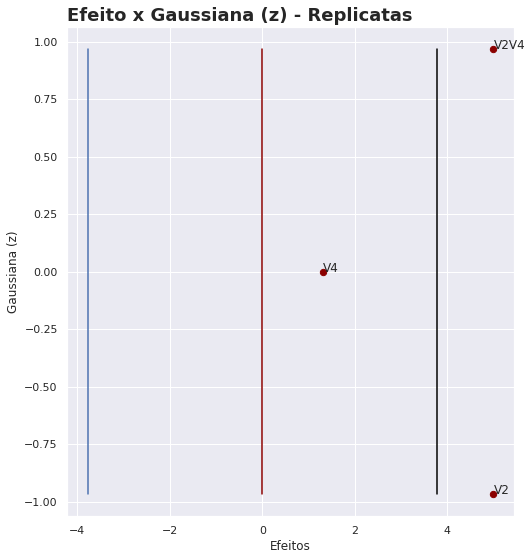

In [658]:
def graficor1():
    annotationsr1 = list(gauss2.index)
    plt.figure(figsize=(8,9))
    ax1 = plt.scatter(list(gauss2['Efeitos']),list(gauss2['Gaussiana']),s=40, color='darkred')
    plt.title('Efeito x Gaussiana (z) - Replicatas', fontsize=18, fontweight='black', loc='left')
    plt.ylabel('Gaussiana (z)')
    plt.xlabel('Efeitos')
    etiquetar1(annotationsr1)
    plt.plot(c1,list(gauss2['Gaussiana']))
    plt.plot(c2,list(gauss2['Gaussiana']), color='darkred')
    plt.plot(c3,list(gauss2['Gaussiana']), color= 'black')
graficor1()

## Gráfico da contribuição de cada efeito

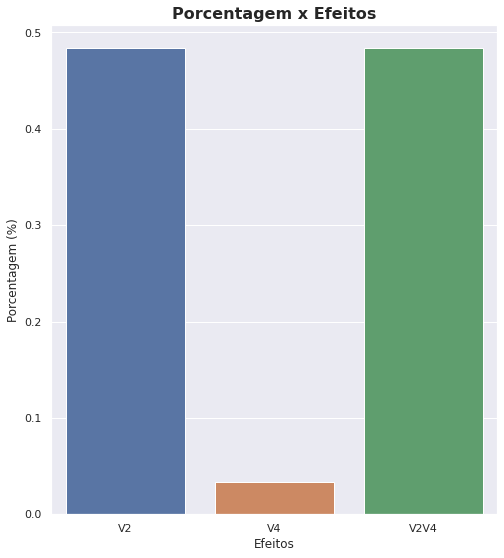

In [659]:
eft_replicas = pd.DataFrame({'Efeitos':gauss2.index, 'Porcentagem (%)':gauss2['Porcentagem']}, index=gauss2.index)
def graficor2():
    plt.figure(figsize=(8,9))
    tips = sns.load_dataset("tips")
    ax2 = sns.barplot(x='Efeitos', y='Porcentagem (%)', data=eft_replicas)
    ax2.set_title('Porcentagem x Efeitos', fontsize=16, fontweight='black')
graficor2()

# Resultados finais - Planejamento Fatorial Completo - Parte 1

### Gráfico de probabilidade com intervalo de confiança.

In [660]:
def salvar():
    writer = pd.ExcelWriter('resultadosfinaisreplicas.xlsx')
    gauss1.to_excel(writer, 'Efeitos-Porcemtagem-Gauss.xlsx')
    gauss2.to_excel(writer, sheet_name='Resultados Replicas')
    replicas.to_excel(writer, sheet_name='replicas.xlsx')
    writer.save()
salvar()

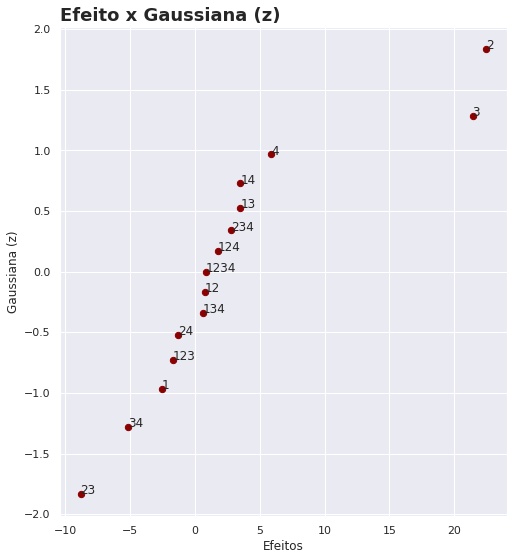

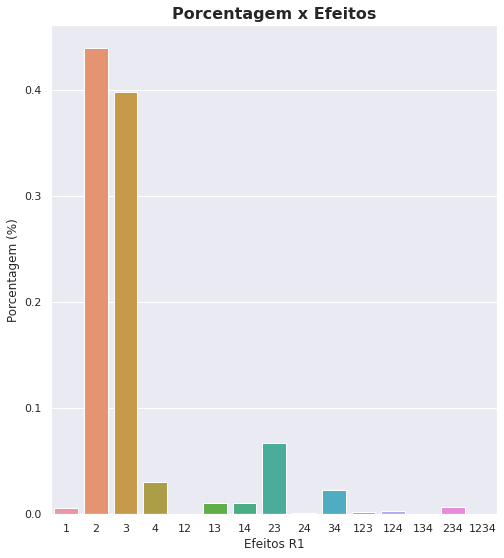

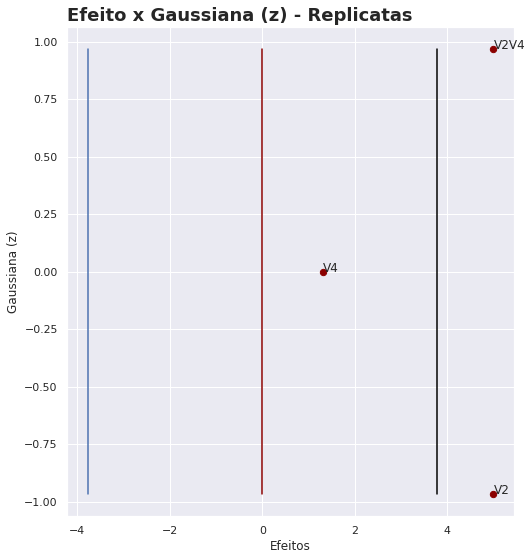

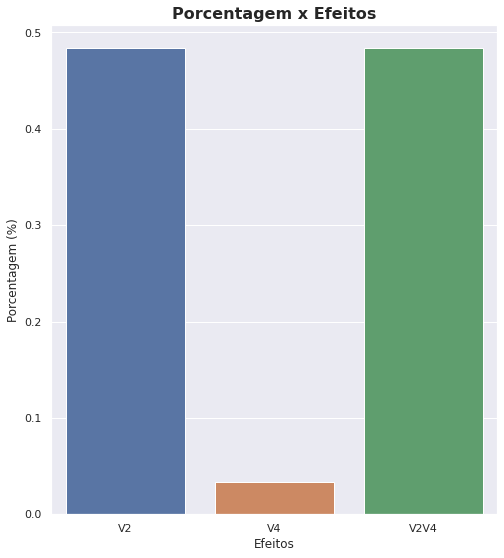

In [661]:
def save_grafico():
    grafico1()
    plt.savefig('Probabilidade.pdf', format='pdf')
    grafico2()
    plt.savefig('ContribuiçãoEfeito.pdf', format='pdf')
    graficor1()
    plt.savefig('ProbabilidadeReplicatas.pdf', format='pdf')
    graficor2()
    plt.savefig('ContribuiçãoEfeitoReplicatas.pdf', format='pdf')
save_grafico()

**CAPÍTULO 2: PLANEJAMENTO FATORIAL FRACIONÁRIO**

**CAPÍTULO 3: CONSTRUÇÃO DE MODELOS DE REGRESSÃO**

# RASCUNHOS

In [ ]:
'''if len(cond) == 1:
  var_exp = replicas['Variância'].mean()
  erro_exp = (var_exp)**(0.5)
  print(f"Variância experimental igual a {var_exp} e Erro experimental igual {erro_exp}")
  replicas['Var_exp'] = var_exp
  replicas['Erro_exp'] = erro_exp
  replicas
if len(cond) == 2:
  var_exp = replicas['Variância'].mean()
  erro_exp = (var_exp)**(0.5)
  print(f"Variância experimental igual a {var_exp} e Erro experimental igual {erro_exp}")
  replicas['Var_exp'] = var_exp
  replicas['Erro_exp'] = erro_exp
  replicas'''

In [ ]:
# RASCUNHO DO CÓDIGO (EXCLUINDO VARIÁVEIS INSIGNIFICANTES)
'''dados2 = dados1.iloc[:,1:6]
dados2['V1'][0]
abc = pd.DataFrame({'A':a,'B':b,'C':c})
var_ex_1 = str(input('Digite a primeira variável insignificante?(V1, V2, V3 ou V4): ')).upper()
var_ex_2 = str(input('Digite a primeira variável insignificante?(V1, V2, V3 ou V4): ')).upper()
A=[1,2,3,4]
B=list(range(5,9))
C=list(range(9,13))
abc = abc.drop(var_ex_1, axis='columns')
abc = abc.drop(var_ex_2, axis='columns')'''

In [ ]:
'''a1 = replicas[replicas.T.index[0]].values
a2 = replicas[replicas.T.index[1]].values
a1a2 = a1*a2
replicas[f'{replicas.T.index[0]}{replicas.T.index[1]}'] = a1a2
replicas'''

In [ ]:
a'''var_ex_1 = str(input('Digite a primeira variável insignificante?(V1, V2, V3 ou V4): ')).upper()
var_ex_2 = str(input('Digite a segunda variável insignificante?(V1, V2, V3 ou V4): ')).upper()
if var_ex_1==var_ex_2:
  print("Erro: Digite duas variáveis diferentes.")
dados2 = dados2.drop(var_ex_1, axis='columns')
dados2 = dados2.drop(var_ex_2, axis='columns')
#dados2 = dados2.iloc[:,:3]
a1 = dados2[dados2.T.index[0]].values
a2 = dados2[dados2.T.index[1]].values
a1a2 = a1*a2
dados3 = dados2.insert(2, f"{dados2.T.index[0]}{dados2.T.index[1]}", a1a2, allow_duplicates=False)
dados3 = dados2.sort_values([f'{dados2.T.index[0]}',f'{dados2.T.index[1]}'], ascending=True)
#dados3 = dados2.sort_values(f'{dados2.T.index[1]}', ascending=True)'''

In [ ]:
'''def call_var1(dados3):
  s1 = dados3.iloc[:1]
  s2 = dados3.iloc[8:9]
  r0 = list(dados3['R'].iloc[1:8].values)
  r1 = list(dados3['R'].iloc[9:16].values)
  for i in range(7):
    s1.loc[:, f'R{i+2}'] = r0[i]
    s2.loc[:, f'R{i+2}'] = r1[i]
def call_var2(dados3):
  s1 = dados3.iloc[:1]
  s2 = dados3.iloc[4:5]
  s3 = dados3.iloc[8:9]
  s4 = dados3.iloc[12:13]
  r0 = list(dados3['R'].iloc[1:4].values)
  r1 = list(dados3['R'].iloc[5:8].values)
  r2 = list(dados3['R'].iloc[9:12].values)
  r3 = list(dados3['R'].iloc[13:16].values)
  for i in range(3):
    s1.loc[:, f'R{i+2}'] = r0[i]
    s2.loc[:, f'R{i+2}'] = r1[i]
    s3.loc[:, f'R{i+2}'] = r2[i]
    s4.loc[:, f'R{i+2}'] = r3[i]
def call_var3(dados3):
  s1 = dados3.iloc[:1]
  s2 = dados3.iloc[2:3]
  s3 = dados3.iloc[4:5]
  s4 = dados3.iloc[6:7]
  s5 = dados3.iloc[8:9]
  s6 = dados3.iloc[10:11]
  s7 = dados3.iloc[12:13]
  s8 = dados3.iloc[14:15]
  r0 = list(dados3['R'].iloc[1:2].values)
  r1 = list(dados3['R'].iloc[3:4].values)
  r2 = list(dados3['R'].iloc[5:6].values)
  r3 = list(dados3['R'].iloc[7:8].values)
  r4 = list(dados3['R'].iloc[9:10].values)
  r5 = list(dados3['R'].iloc[11:12].values)
  r6 = list(dados3['R'].iloc[13:14].values)
  r7 = list(dados3['R'].iloc[15:16].values)
  rt = [r0, r1, r2, r3, r4, r5, r6, r7]
  st = [s1, s2, s3, s4, s5, s6, s7, s8]
  for i in rt:
    for j in i:
      rtotal.append(j)
  for j in range(len(rt)):
    for i in range(1):
      s1[f'R{i+2}'] = rtotal[i]
      s2[f'R{i+2}'] = rtotal[i]
      s3[f'R{i+2}'] = rtotal[i]
      s4[f'R{i+2}'] = rtotal[i]
      s5[f'R{i+2}'] = rtotal[i]
      s6[f'R{i+2}'] = rtotal[i]
      s7[f'R{i+2}'] = rtotal[i]
      s8[f'R{i+2}'] = rtotal[i]
  return rt, st'''

In [ ]:
'''if dados3.shape[1] == 4:
  index = [dados3.iloc[0:4].index, dados3.iloc[4:8].index, dados3.iloc[8:12].index, dados3.iloc[12:16].index]
  replicas = pd.DataFrame(columns = [f'{dados2.T.index[0]}', f'{dados2.T.index[1]}',f'{dados2.T.index[0]}{dados2.T.index[1]}',	'R1',	'R2',	'R3', 'R4'], index=index)
  replicas.iloc[:1,:] = list(s1.values)
  replicas.iloc[1:2,:] = list(s2.values)
  replicas.iloc[2:3,:] = list(s3.values)
  replicas.iloc[3:4,:] = list(s4.values)
  replicas.to_excel('replicas.xlsx')'''

In [ ]:
'''if len(cond) == 1:
  k = 4-len(cond)
  erro_eft = (2*erro_exp)/((n0*(2**k))**(0.5))
  replicas['Erro_eft'] = erro_eft
  print(f'Erro de um Efeito: {erro_eft}')
if len(cond) == 2:
  k = 4-len(cond)
  erro_eft = (2*erro_exp)/((n0*(2**k))**(0.5))
  replicas['Erro_eft'] = erro_eft
  print(f'Erro de um Efeito: {erro_eft}')'''

In [ ]:
'''if len(cond) == 1:
  a = replicas[replicas.T.index[2]].values
  a2 = a**2
  sum_a = np.sum(a2)/replicas.shape[0]
  var_eft = sum_a*(var_exp/replicas.shape[0])
  replicas['Var_eft'] = var_eft
if len(cond) == 2:
  a = replicas[replicas.T.index[2]].values
  a2 = a**2
  sum_a = np.sum(a2)/replicas.shape[0]
  var_eft = sum_a*(var_exp/replicas.shape[0])
  replicas['Var_eft'] = var_eft'''